<h1 align="center">
<img src="https://drive.google.com/uc?export=view&id=1_ZkE3dnYg9KykzdZE6lIK2s_q_nbiKk_" width="160" height="160">
</h1>
<h1 align="center">Statistical Learning - 255381</h1>
<h3 align="center">Dr. Hoda Mohammadzade</h3>
<h5 align="center">Sharif University of Technology<br/>Electrical Engineering Department<br/>  Spring 2022</h5>

---

# Problem Set 06
<h4 align="center">Vahid Pourakbar     400205511</h4>


---
---

In [1]:
%reset -f
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import recall_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.preprocessing import PolynomialFeatures

## Question 7

In [31]:
Insurance_dataset = pd.read_csv('insurance.csv')
Insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16.885
1,18,male,33.770,1,no,southeast,1.726
2,28,male,33.000,3,no,southeast,4.449
3,33,male,22.705,0,no,northwest,21.984
4,32,male,28.880,0,no,northwest,3.867


In [32]:
cat_col = Insurance_dataset.select_dtypes(include='object').columns

dummy_dataset = Insurance_dataset.drop(columns=cat_col)
for var in cat_col:
    dummy_dataset = dummy_dataset.join(pd.get_dummies(Insurance_dataset[var], prefix=var, drop_first=True))
dummy_dataset.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16.885,0,1,0,0,1
1,18,33.770,1,1.726,1,0,0,1,0
2,28,33.000,3,4.449,1,0,0,1,0
3,33,22.705,0,21.984,1,0,1,0,0
4,32,28.880,0,3.867,1,0,1,0,0


In [34]:
X = dummy_dataset.drop(labels='charges', axis=1)
y = dummy_dataset['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2, shuffle=True)

model = LinearRegression().fit(X_train,y_train)
print(f'train score = {model.score(X_train, y_train)}')
print('MSE for train sets:', mean_squared_error(y_train, model.predict(X_train)))
print('MSE for test  sets:', mean_squared_error(y_test, model.predict(X_test)))
print('R2_score for test  sets:', r2_score(y_test, model.predict(X_test)))

train score = 0.7520189836385448
MSE for train sets: 36.10023907559572
MSE for test  sets: 38.305056850279506


### Part A

In [45]:
X1_train = np.concatenate((X_train,X_train*X_train),axis=1)
X1_test = np.concatenate((X_test,X_test*X_test),axis=1)

model1 = LinearRegression().fit(X1_train,y_train)
print(f'train score = {model1.score(X1_train, y_train)}')
print('MSE for train sets:', mean_squared_error(y_train, model1.predict(X1_train)))
print('MSE for test  sets:', mean_squared_error(y_test, model1.predict(X1_test)))
print('R2_score for test  sets:', r2_score(y_test, model1.predict(X1_test)))

train score = 0.7560052801794406
MSE for train sets: 35.51992748455522
MSE for test  sets: 37.50397057527531
R2_score for test  sets: 0.750275014251907


### Part B

In [39]:
poly_model = PolynomialFeatures(degree = 2)
X2_train = poly_model.fit_transform(X_train)
X2_test = poly_model.fit_transform(X_test)

model2 = LinearRegression().fit(X2_train,y_train)
print(f'train score = {model2.score(X2_train, y_train)}')
print('MSE for train sets:', mean_squared_error(y_train, model2.predict(X2_train)))
print('MSE for test  sets:', mean_squared_error(y_test, model2.predict(X2_test)))
print('R2_score for test  sets:', r2_score(y_test, model2.predict(X2_test)))

train score = 0.8406707819167124
MSE for train sets: 23.194609607336226
MSE for test  sets: 22.94919244848713
R2_score for test  sets: 0.8471898663202644


## Question 8

In [2]:
# URL = r"https://drive.google.com/file/d/1sq18MxrJKh1KbjeSo3OKzmlhD3puUD37/view?usp=sharing"
creditcard_dataset = pd.read_csv('creditcard.csv')
df = creditcard_dataset.copy()  # To keep the data as backup
df['Class'] = [0 if x=="'0'" else 1 for x in df['Class']]
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
X = df.drop(labels='Class', axis=1)
Y = df['Class']

X_scaled = MinMaxScaler().fit_transform(X)
X_scaled = pd.DataFrame(data=X_scaled, columns=X.columns)
X_scaled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.000000,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,...,0.582942,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824
1,0.000000,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,...,0.579530,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105
2,0.000006,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,...,0.585855,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739
3,0.000006,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,...,0.578050,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807
4,0.000012,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,...,0.584615,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=2, test_size=0.2, shuffle=True)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(227845, 30) (227845,)
(56962, 30) (56962,)


In [ ]:
# df['Amount-Bins'] = ''
# bins = np.linspace(df.Amount.min(), df.Amount.max(), num=10)

# bin_labels = []
# bins_last_index = bins.shape[0] - 1

# for id, val in enumerate(bins):
#     if id == bins_last_index:
#         continue
#     val_to_put = str(int(bins[id])) + ' to ' + str(int(bins[id + 1]))
#     bin_labels.append(val_to_put)

# df['Amount-Bins'] = pd.cut(df.Amount, bins=bins, labels=bin_labels, include_lowest=True)

In [5]:
model = SVC(kernel='linear', probability=True).fit(X_train, y_train)

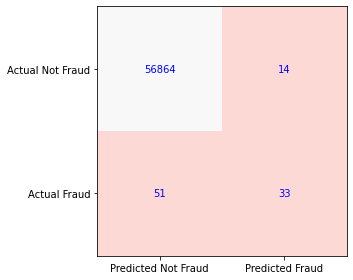

In [15]:
cm = confusion_matrix(y_test, model.predict(X_test))
fig, ax = plt.subplots(figsize=(10, 4))
ax.imshow(cm, cmap = 'Pastel1', alpha = 0.5)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Not Fraud', 'Predicted Fraud'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Not Fraud', 'Actual Fraud'))
ax.set_ylim(1.5, -0.5), ax.grid(False)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='b')
fig.tight_layout()


reclal_score =  0.39285714285714285


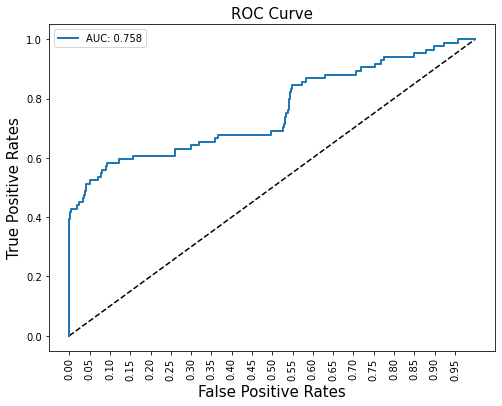

In [6]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8, 6))
    plt.title('ROC Curve', fontsize=15)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.xticks(np.arange(0, 1, 0.05), rotation=90)
    plt.xlabel('False Positive Rates', fontsize=15)
    plt.ylabel('True Positive Rates', fontsize=15)
    plt.legend(loc='best')
    
    plt.show()

svc_pred = model.predict(X_test)
print('reclal_score = ',recall_score(y_test, svc_pred))
svc_pred_prob = model.predict_proba(X_test)[:, 1]

# getting the auc score
svc_auc = roc_auc_score(y_test, svc_pred_prob)

# getting the fpr and tpr
fpr, tpr, threshold = roc_curve(y_test, svc_pred_prob)

plot_roc_curve(fpr, tpr, 'AUC: %.3f' % svc_auc)